In [11]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.8 MB/s eta 0:00:00:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
from qiskit import *
import numpy as np
from qiskit_aer import Aer
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

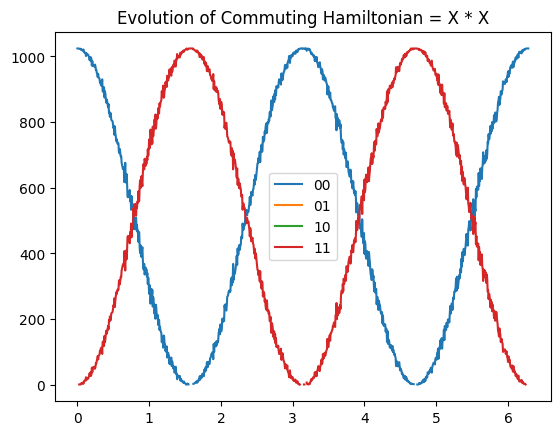

In [37]:
# H = XX
def simulate_hamiltonian_X_X(t):
    qc = QuantumCircuit(2,2)

    # use diagonalized implementation of H = XX = HH ZZ HH
    # rotation for exponentiated ZZ 
    qc.h(0)
    qc.h(1)
    qc.cx(0,1)
    qc.rz(2 * t, 1)
    qc.cx(0,1)
    qc.h(0)
    qc.h(1)

    qc.measure(0,0)
    qc.measure(1,1)

    qc.draw()

    simulator = Aer.get_backend('qasm_simulator')

    circ = transpile(qc, simulator)
    result = simulator.run(circ).result()

    return result

# store results for plotting
counts_00 = []
counts_01 = []
counts_10 = []
counts_11 = []

# show time evolution of Hamiltonian from 0 to 2pi 
times = np.linspace(0, 2 * np.pi, 1000)
for t in times:
    result = simulate_hamiltonian_X_X(t)

    counts_00.append(result.get_counts().get('00'))
    counts_01.append(result.get_counts().get('01'))
    counts_10.append(result.get_counts().get('10'))
    counts_11.append(result.get_counts().get('11'))

plt.figure()
plt.plot(times, counts_00, label='00')
plt.plot(times, counts_01, label='01')
plt.plot(times, counts_10, label='10')
plt.plot(times, counts_11, label='11')
plt.legend()
plt.title("Evolution of Commuting Hamiltonian = X * X")
plt.show()


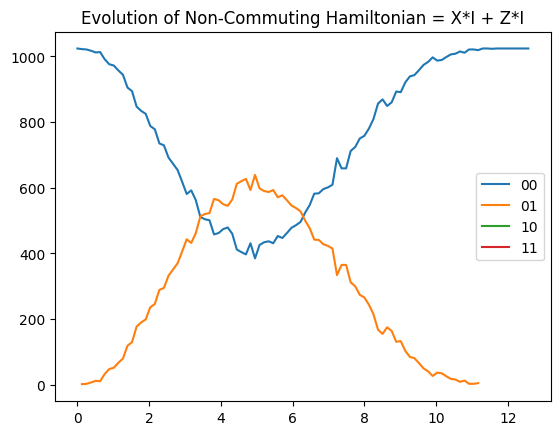

In [36]:
# H = (X*I) + (Z*I)
def simulate_hamiltonian_X_plus_Z(t, num_trot):
    dt = t / num_trot  # time step for each Trotter step
    theta = dt / 2  # theta for the Rx and Rz rotations
    
    qc = QuantumCircuit(2, 2) 

    # implement trotterization since H is non-commuting
    for _ in range(num_trot):

        qc.rx(theta, 0) # rotation given by exp(-i Xtheta/2)
        qc.rz(theta, 0) # rotation given by exp(-i Ytheta/2)
    
    qc.measure(0, 0)
    qc.measure(1, 1)
    
    simulator = Aer.get_backend('qasm_simulator')
    circ = transpile(qc, simulator)
    result = simulator.run(circ).result()
    
    return result

# store results for plotting
counts_00 = []
counts_01 = []
counts_10 = []
counts_11 = []

# show time evolution of Hamiltonian from 0 to 2pi 
times = np.linspace(0, 4 * np.pi, 100)
for t in times:
    result = simulate_hamiltonian_X_plus_Z(t, num_trot=2)
    
    counts_00.append(result.get_counts().get('00'))
    counts_01.append(result.get_counts().get('01'))
    counts_10.append(result.get_counts().get('10'))
    counts_11.append(result.get_counts().get('11'))

plt.figure()
plt.plot(times, counts_00, label='00')
plt.plot(times, counts_01, label='01')
plt.plot(times, counts_10, label='10')
plt.plot(times, counts_11, label='11')
plt.legend()
plt.title("Evolution of Non-Commuting Hamiltonian = X*I + Z*I")
plt.show()